In [1]:
import pandas as pd

file1 = pd.read_excel('E:/2022国赛/C题/1.xlsx',sheet_name='表单1')
file2 = pd.read_excel('E:/2022国赛/C题/1.xlsx',sheet_name='表单2')
file3 = pd.read_excel('E:/2022国赛/C题/1.xlsx',sheet_name='表单3')

# 1 问题二

In [2]:
from tqdm import tqdm
import re
tqdm.pandas()

def clear_id(s):
    ss = str(s)
    n = int(re.findall(r"\d+",ss)[0])
    return n
file2['id'] = file2['文物采样点'].progress_apply(clear_id)
file1['id'] = file1['文物编号'].progress_apply(clear_id)

100%|██████████████████████████████████████████████████████████████████████████████████████████| 58/58 [00:00<?, ?it/s]


In [3]:
cols = ['纹饰', '类型', '颜色', '表面风化', '二氧化硅(SiO2)',
       '氧化钠(Na2O)', '氧化钾(K2O)', '氧化钙(CaO)', '氧化镁(MgO)', '氧化铝(Al2O3)',
       '氧化铁(Fe2O3)', '氧化铜(CuO)', '氧化铅(PbO)', '氧化钡(BaO)', '五氧化二磷(P2O5)',
       '氧化锶(SrO)', '氧化锡(SnO2)', '二氧化硫(SO2)']
cols1 = ['二氧化硅(SiO2)',
       '氧化钠(Na2O)', '氧化钾(K2O)', '氧化钙(CaO)', '氧化镁(MgO)', '氧化铝(Al2O3)',
       '氧化铁(Fe2O3)', '氧化铜(CuO)', '氧化铅(PbO)', '氧化钡(BaO)', '五氧化二磷(P2O5)',
       '氧化锶(SrO)', '氧化锡(SnO2)', '二氧化硫(SO2)']
cols2 = ['纹饰', '类型', '颜色', '表面风化',]

In [4]:
file_data = pd.merge(file1,file2,on='id')
Gao_data = file_data[file_data['类型']=='高钾'][cols]
Qian_data = file_data[file_data['类型']=='铅钡'][cols]

In [5]:
file_data['颜色'] = file_data['颜色'].fillna('浅蓝')
file_data=file_data.fillna(0)
file_data.to_excel("E:/2022国赛/C题/问题二代码及图片/问题二代码及图片/data/all_data.xlsx")

In [6]:
Gao_data.isnull().any()

纹饰             False
类型             False
颜色             False
表面风化           False
二氧化硅(SiO2)     False
氧化钠(Na2O)       True
氧化钾(K2O)        True
氧化钙(CaO)        True
氧化镁(MgO)        True
氧化铝(Al2O3)      True
氧化铁(Fe2O3)      True
氧化铜(CuO)        True
氧化铅(PbO)        True
氧化钡(BaO)        True
五氧化二磷(P2O5)     True
氧化锶(SrO)        True
氧化锡(SnO2)       True
二氧化硫(SO2)       True
dtype: bool

In [7]:
Qian_data.isnull().any()

纹饰             False
类型             False
颜色              True
表面风化           False
二氧化硅(SiO2)     False
氧化钠(Na2O)       True
氧化钾(K2O)        True
氧化钙(CaO)        True
氧化镁(MgO)        True
氧化铝(Al2O3)     False
氧化铁(Fe2O3)      True
氧化铜(CuO)        True
氧化铅(PbO)       False
氧化钡(BaO)        True
五氧化二磷(P2O5)     True
氧化锶(SrO)        True
氧化锡(SnO2)       True
二氧化硫(SO2)       True
dtype: bool

In [8]:
Qian_data['颜色'].value_counts()

浅蓝    20
深绿     6
紫      6
黑      4
浅绿     3
蓝绿     3
深蓝     2
绿      1
Name: 颜色, dtype: int64

In [9]:
Qian_data['颜色'] = Qian_data['颜色'].fillna('浅蓝')
Qian_data = Qian_data.fillna(0)
Gao_data = Gao_data.fillna(0)

In [10]:


Gao_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 30
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   纹饰           20 non-null     object 
 1   类型           20 non-null     object 
 2   颜色           20 non-null     object 
 3   表面风化         20 non-null     object 
 4   二氧化硅(SiO2)   20 non-null     float64
 5   氧化钠(Na2O)    20 non-null     float64
 6   氧化钾(K2O)     20 non-null     float64
 7   氧化钙(CaO)     20 non-null     float64
 8   氧化镁(MgO)     20 non-null     float64
 9   氧化铝(Al2O3)   20 non-null     float64
 10  氧化铁(Fe2O3)   20 non-null     float64
 11  氧化铜(CuO)     20 non-null     float64
 12  氧化铅(PbO)     20 non-null     float64
 13  氧化钡(BaO)     20 non-null     float64
 14  五氧化二磷(P2O5)  20 non-null     float64
 15  氧化锶(SrO)     20 non-null     float64
 16  氧化锡(SnO2)    20 non-null     float64
 17  二氧化硫(SO2)    20 non-null     float64
dtypes: float64(14), object(4)
memory usage: 3.0+ KB


In [11]:
Gao_data

,纹饰,类型,颜色,表面风化,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
0,C,高钾,蓝绿,无风化,69.33,0.00,9.99,6.32,0.87,3.93,1.74,3.87,0.00,0.00,1.17,0.00,0.00,0.39
2,A,高钾,蓝绿,无风化,87.05,0.00,5.19,2.01,0.00,4.06,0.00,0.78,0.25,0.00,0.66,0.00,0.00,0.00
3,A,高钾,蓝绿,无风化,61.71,0.00,12.37,5.87,1.11,5.50,2.16,5.09,1.41,2.86,0.70,0.10,0.00,0.00
4,A,高钾,蓝绿,无风化,65.88,0.00,9.67,7.12,1.56,6.44,2.06,2.18,0.00,0.00,0.79,0.00,0.00,0.36
5,A,高钾,蓝绿,无风化,61.58,0.00,10.95,7.35,1.77,7.50,2.62,3.27,0.00,0.00,0.94,0.06,0.00,0.47
6,A,高钾,蓝绿,无风化,67.65,0.00,7.37,0.00,1.98,11.15,2.39,2.51,0.20,1.38,4.18,0.11,0.00,0.00
7,A,高钾,蓝绿,无风化,59.81,0.00,7.68,5.41,1.73,10.05,6.04,2.18,0.35,0.97,4.50,0.12,0.00,0.00
8,B,高钾,蓝绿,风化,92.63,0.00,0.00,1.07,0.00,1.98,0.17,3.24,0.00,0.00,0.61,0.00,0.00,0.00
11,B,高钾,蓝绿,风化,95.02,0.00,0.59,0.62,0.00,1.32,0.32,1.55,0.00,0.00,0.35,0.00,0.00,0.00
12,B,高钾,蓝绿,风化,96.77,0.00,0.92,0.21,0.00,0.81,0.26,0.84,0.00,0.00,0.00,0.00,0.00,0.00


In [12]:
Gao_data[cols1].sum(axis=1)

0      97.61
2     100.00
3      98.88
4      96.06
5      96.51
6      98.92
7      98.84
8      99.70
11     99.77
12     99.81
14     99.57
15     98.14
16     99.00
17     79.47
18     98.41
19     71.89
20     97.25
23     98.52
24    100.00
30     98.81
dtype: float64

In [13]:
# 存在两个无效数据
(Gao_data[cols1].sum(axis=1)<85).value_counts()


False    18
True      2
dtype: int64

In [14]:
# 删除两个两个无效数据
Gao_data = Gao_data.drop([17,19])

In [15]:
from sklearn.preprocessing import LabelEncoder

Gao_train = pd.DataFrame() # 用于存放编码后的训练数据
label = LabelEncoder() # 标号编码器
X= Gao_data
for c in X.columns: # 对每个特征列
    if X[c].dtype=='object': # 如果是字符串形式的(字符串读到pandas里dtype是object)
        Gao_train[c] = label.fit_transform(X[c]) # 将整个这一列进行标号编码，写到新的dataframe里
    else: # 其它类型的特征(数值,布尔)保持原样写入
        Gao_train[c] = list(X[c])

Qian_train = pd.DataFrame() # 用于存放编码后的训练数据
label = LabelEncoder() # 标号编码器
X= Qian_data
for c in X.columns: # 对每个特征列
    if X[c].dtype=='object': # 如果是字符串形式的(字符串读到pandas里dtype是object)
        Qian_train[c] = label.fit_transform(X[c]) # 将整个这一列进行标号编码，写到新的dataframe里
    else: # 其它类型的特征(数值,布尔)保持原样写入
        Qian_train[c] = list(X[c])


In [16]:
Qian_data

,纹饰,类型,颜色,表面风化,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
1,A,铅钡,浅蓝,风化,36.28,0.00,1.05,2.34,1.18,5.73,1.86,0.26,47.43,0.00,3.57,0.19,0.00,0.00
9,C,铅钡,紫,风化,20.14,0.00,0.00,1.48,0.00,1.34,0.00,10.41,28.68,31.23,3.59,0.37,0.00,2.58
10,C,铅钡,紫,风化,4.61,0.00,0.00,3.19,0.00,1.11,0.00,3.14,32.45,30.62,7.56,0.53,0.00,15.03
13,C,铅钡,浅蓝,风化,33.59,0.00,0.21,3.51,0.71,2.69,0.00,4.93,25.39,14.61,9.38,0.37,0.00,0.00
21,A,铅钡,浅蓝,风化,29.64,0.00,0.00,2.93,0.59,3.57,1.33,3.51,42.82,5.35,8.83,0.19,0.00,0.00
22,A,铅钡,浅蓝,无风化,37.36,0.00,0.71,0.00,0.00,5.45,1.51,4.78,9.30,23.55,5.75,0.00,0.00,0.00
25,A,铅钡,蓝绿,风化,53.79,7.92,0.00,0.50,0.71,1.42,0.00,2.99,16.98,11.86,0.00,0.33,0.00,0.00
26,C,铅钡,紫,无风化,31.94,0.00,0.00,0.47,0.00,1.59,0.00,8.46,29.14,26.23,0.14,0.91,0.00,0.00
27,C,铅钡,浅蓝,风化,50.61,2.31,0.00,0.63,0.00,1.90,1.55,1.12,31.90,6.65,0.19,0.20,0.00,0.00
28,C,铅钡,紫,风化,19.79,0.00,0.00,1.44,0.00,0.70,0.00,10.57,29.53,32.25,3.13,0.45,0.00,1.96


In [17]:

Gao_train.to_excel("E:/2022国赛/C题/问题二代码及图片/问题二代码及图片/data/Gao_train.xlsx")
Gao_train

,纹饰,类型,颜色,表面风化,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
0,2,0,3,0,69.33,0.00,9.99,6.32,0.87,3.93,1.74,3.87,0.00,0.00,1.17,0.00,0.00,0.39
1,0,0,3,0,87.05,0.00,5.19,2.01,0.00,4.06,0.00,0.78,0.25,0.00,0.66,0.00,0.00,0.00
2,0,0,3,0,61.71,0.00,12.37,5.87,1.11,5.50,2.16,5.09,1.41,2.86,0.70,0.10,0.00,0.00
3,0,0,3,0,65.88,0.00,9.67,7.12,1.56,6.44,2.06,2.18,0.00,0.00,0.79,0.00,0.00,0.36
4,0,0,3,0,61.58,0.00,10.95,7.35,1.77,7.50,2.62,3.27,0.00,0.00,0.94,0.06,0.00,0.47
5,0,0,3,0,67.65,0.00,7.37,0.00,1.98,11.15,2.39,2.51,0.20,1.38,4.18,0.11,0.00,0.00
6,0,0,3,0,59.81,0.00,7.68,5.41,1.73,10.05,6.04,2.18,0.35,0.97,4.50,0.12,0.00,0.00
7,1,0,3,1,92.63,0.00,0.00,1.07,0.00,1.98,0.17,3.24,0.00,0.00,0.61,0.00,0.00,0.00
8,1,0,3,1,95.02,0.00,0.59,0.62,0.00,1.32,0.32,1.55,0.00,0.00,0.35,0.00,0.00,0.00
9,1,0,3,1,96.77,0.00,0.92,0.21,0.00,0.81,0.26,0.84,0.00,0.00,0.00,0.00,0.00,0.00


In [18]:
drop_columns=["纹饰","类型","颜色","表面风化"]
Gao_train=Gao_train.drop(drop_columns,axis=1)
Qian_train=Qian_train.drop(drop_columns,axis=1)
Gao_train

,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
0,69.33,0.00,9.99,6.32,0.87,3.93,1.74,3.87,0.00,0.00,1.17,0.00,0.00,0.39
1,87.05,0.00,5.19,2.01,0.00,4.06,0.00,0.78,0.25,0.00,0.66,0.00,0.00,0.00
2,61.71,0.00,12.37,5.87,1.11,5.50,2.16,5.09,1.41,2.86,0.70,0.10,0.00,0.00
3,65.88,0.00,9.67,7.12,1.56,6.44,2.06,2.18,0.00,0.00,0.79,0.00,0.00,0.36
4,61.58,0.00,10.95,7.35,1.77,7.50,2.62,3.27,0.00,0.00,0.94,0.06,0.00,0.47
5,67.65,0.00,7.37,0.00,1.98,11.15,2.39,2.51,0.20,1.38,4.18,0.11,0.00,0.00
6,59.81,0.00,7.68,5.41,1.73,10.05,6.04,2.18,0.35,0.97,4.50,0.12,0.00,0.00
7,92.63,0.00,0.00,1.07,0.00,1.98,0.17,3.24,0.00,0.00,0.61,0.00,0.00,0.00
8,95.02,0.00,0.59,0.62,0.00,1.32,0.32,1.55,0.00,0.00,0.35,0.00,0.00,0.00
9,96.77,0.00,0.92,0.21,0.00,0.81,0.26,0.84,0.00,0.00,0.00,0.00,0.00,0.00


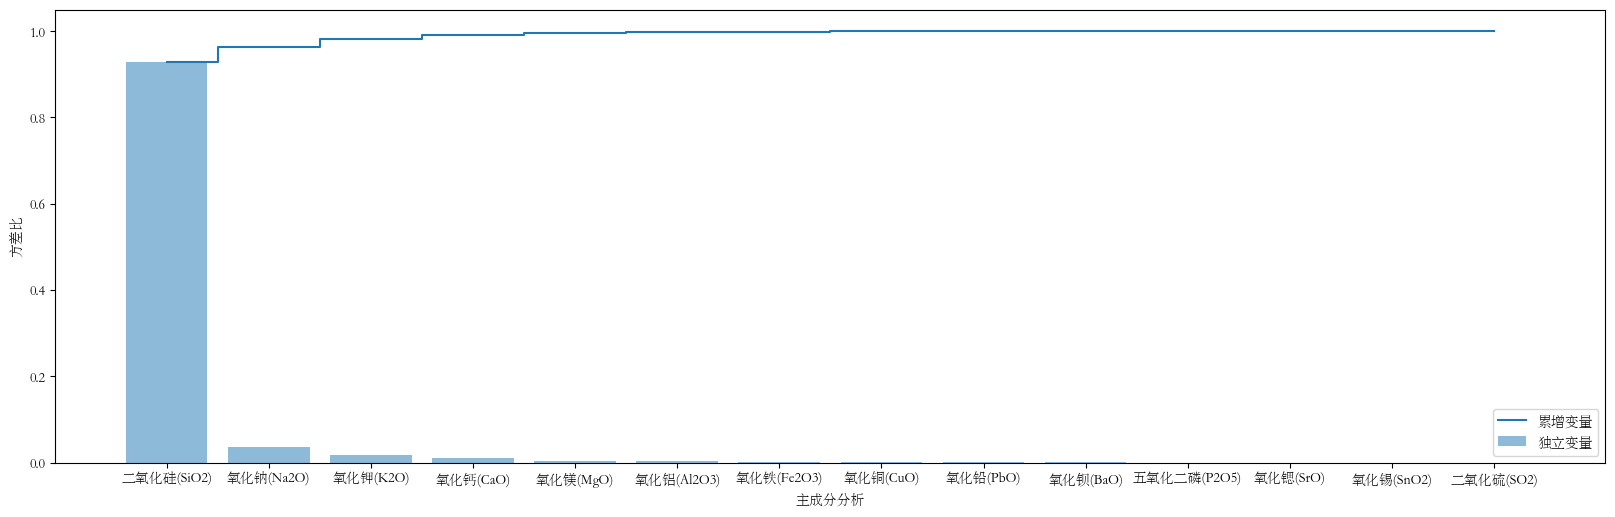

In [19]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from numpy.linalg import eig
plt.rcParams['font.sans-serif'] = ['STSong']
#matplotlib inline

X = Gao_train
X = X - X.mean(axis = 0)

#计算协方差矩阵
X_cov = np.cov(X.T, ddof = 0)

#计算协方差矩阵的特征值和特征向量
eigenvalues,eigenvectors = eig(X_cov)

tot = sum(eigenvalues)
# var_exp = [(i/tot) for i in sorted(eigenvalues, reverse = True)]
var_exp = [(i/tot) for i in eigenvalues]

cum_var_exp = np.cumsum(var_exp)

# plt.bar(range(0,len(Gao_train.columns)), var_exp, alpha = 0.5, align = 'center', label = 'individual var')
# plt.step(range(0,len(Gao_train.columns)), cum_var_exp, where = 'mid', label = 'cumulative var')4
plt.figure(figsize=(20,6),dpi=100)
plt.bar(Gao_train.columns, var_exp, alpha = 0.5, align = 'center', label = '独立变量')
plt.step(Gao_train.columns, cum_var_exp, where = 'mid', label = '累增变量')
plt.ylabel('方差比')
plt.xlabel('主成分分析')
plt.legend(loc = 'best')
plt.savefig("E:/2022国赛/C题/问题二代码及图片/问题二代码及图片/pic/高钾主成分分析占比图.png")
plt.show()


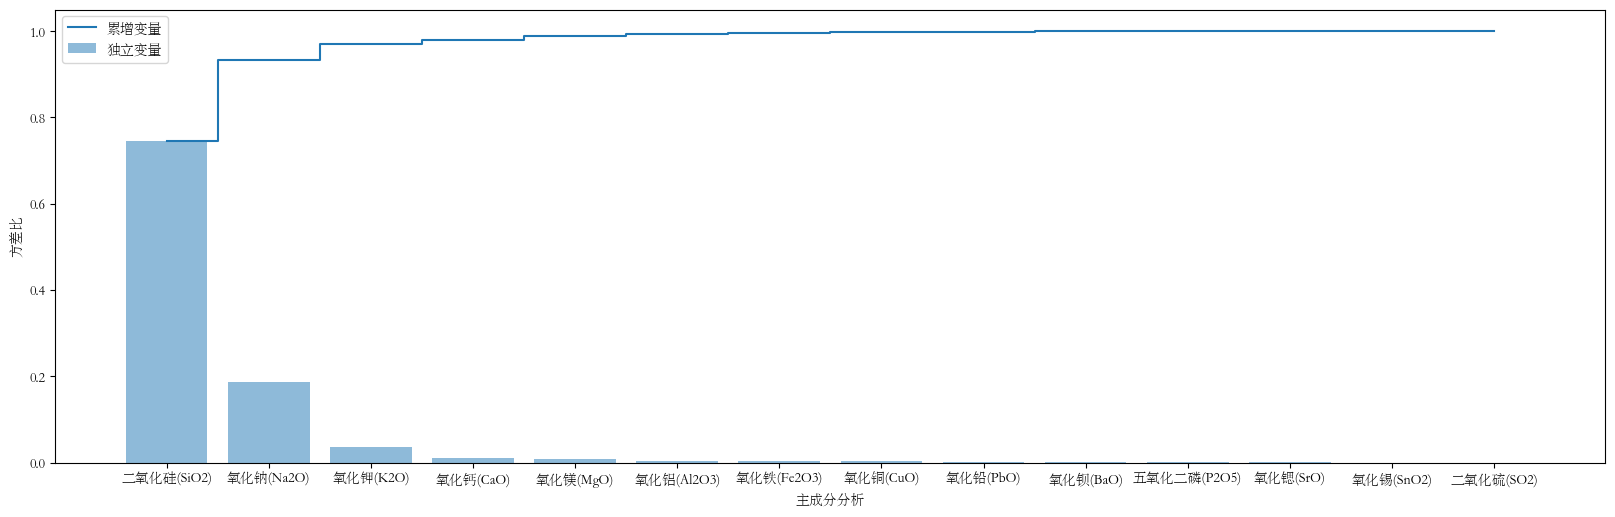

In [20]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from numpy.linalg import eig
plt.rcParams['font.sans-serif'] = ['STSong']
#matplotlib inline

X = Qian_train
X = X - X.mean(axis = 0)

#计算协方差矩阵
X_cov = np.cov(X.T, ddof = 0)

#计算协方差矩阵的特征值和特征向量
eigenvalues,eigenvectors = eig(X_cov)

tot = sum(eigenvalues)
# var_exp = [(i/tot) for i in sorted(eigenvalues, reverse = True)]
var_exp = [(i/tot) for i in eigenvalues]

cum_var_exp = np.cumsum(var_exp)

# plt.bar(range(0,len(Gao_train.columns)), var_exp, alpha = 0.5, align = 'center', label = 'individual var')
# plt.step(range(0,len(Gao_train.columns)), cum_var_exp, where = 'mid', label = 'cumulative var')4
plt.figure(figsize=(20,6),dpi=100)
plt.bar(Gao_train.columns, var_exp, alpha = 0.5, align = 'center', label = '独立变量')
plt.step(Gao_train.columns, cum_var_exp, where = 'mid', label = '累增变量')
plt.ylabel('方差比')
plt.xlabel('主成分分析')
plt.legend(loc = 'best')
plt.savefig("E:/2022国赛/C题/问题二代码及图片/问题二代码及图片/pic/高钾主成分分析占比图.png")
plt.show()


In [21]:
select_columns=["二氧化硅(SiO2)","氧化钠(Na2O)","氧化钾(K2O)","氧化钙(CaO)"]
select_columns

['二氧化硅(SiO2)', '氧化钠(Na2O)', '氧化钾(K2O)', '氧化钙(CaO)']

In [22]:
Gao_train=Gao_train[select_columns]
Qian_train=Qian_train[select_columns]


In [23]:
# >>> import numpy as np
# >>> from sklearn.decomposition import PCA

# # 输入待降维数据 (5 * 6) 矩阵，6个维度，5个样本值
# >>> A = Gao_train
# # >>> print(A)

 
# # 直接使用PCA进行降维
# >>> pca = PCA(n_components=2) #降到 2 维
# >>> pca.fit(A)
# PCA(n_components=2)
# >>> pca.transform(A) # 降维后的结果

# >>> pca.explained_variance_ratio_ # 降维后的各主成分的方差值占总方差值的比例，即方差贡献率

# # >>> pca.explained_variance_ # 降维后的各主成分的方差值



In [24]:
import sys
!{sys.executable} -m pip install yellowbrick -i https://pypi.tuna.tsinghua.edu.cn/simple --user

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Could not fetch URL https://pypi.tuna.tsinghua.edu.cn/simple/scikit-learn/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.tuna.tsinghua.edu.cn', port=443): Max retries exceeded with url: /simple/scikit-learn/ (Caused by SSLError(SSLEOFError(8, 'EOF occurred in violation of protocol (_ssl.c:1125)'))) - skipping
Could not fetch URL https://pypi.tuna.tsinghua.edu.cn/simple/yellowbrick/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.tuna.tsinghua.edu.cn', port=443): Max retries exceeded with url: /simple/yellowbrick/ (Caused by SSLError(SSLEOFError(8, 'EOF occurred in violation of protocol (_ssl.c:1125)'))) - skipping


ERROR: Could not find a version that satisfies the requirement scikit-learn>=1.0.0 (from yellowbrick)
ERROR: No matching distribution found for scikit-learn>=1.0.0


## 2.2 层次聚类

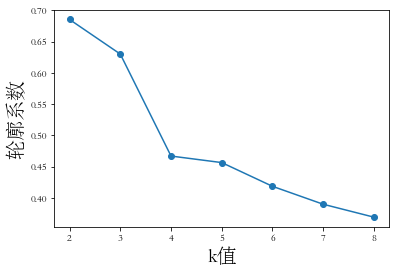

In [25]:
    picpath="E:/2022国赛/C题/问题二代码及图片/问题二代码及图片/pic"
    import pandas as pd
    import numpy as np
    from sklearn.cluster import AgglomerativeClustering #导入sklearn的层次聚类函数
    from sklearn.metrics import silhouette_score#引入样本轮廓系数  用来评价聚类的效果
    import matplotlib.pyplot as plt
    plt.rcParams['font.sans-serif'] = ['STSong']
    data = np.array(Gao_train)

    Scores = []  # 存放轮廓系数
    SSE = []  # 存放每次结果的误差平方和
    for k in range(2, 9):
        estimator = AgglomerativeClustering(n_clusters = k, linkage = 'ward')
        estimator.fit(data)
        Scores.append(silhouette_score(
            np.array(data), estimator.labels_, metric='euclidean'))
    X = range(2,9)
    plt.xlabel('k值',fontsize=20)
    plt.ylabel('轮廓系数',fontsize=20)
    plt.plot(X, Scores, 'o-')
    plt.savefig(picpath+'/AGG聚类——高钾数据手肘法.png',dpi=300)
    plt.show()

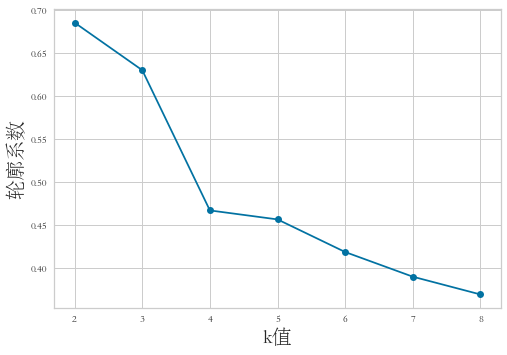

In [45]:
picpath="E:/2022国赛/C题/问题二代码及图片/问题二代码及图片/pic"
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering #导入sklearn的层次聚类函数
from sklearn.metrics import silhouette_score#引入样本轮廓系数  用来评价聚类的效果
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['STSong']
data = np.array(Gao_train)

Scores = []  # 存放轮廓系数
SSE = []  # 存放每次结果的误差平方和
for k in range(2, 9):
    estimator = AgglomerativeClustering(n_clusters = k, linkage = 'ward')
    estimator.fit(data)
    Scores.append(silhouette_score(
        np.array(data), estimator.labels_, metric='euclidean'))
X = range(2,9)
plt.xlabel('k值',fontsize=20)
plt.ylabel('轮廓系数',fontsize=20)
plt.plot(X, Scores, 'o-')
plt.savefig(picpath+'/AGG聚类——高钾数据手肘法.png',dpi=300)
plt.show()

In [26]:
# #
# import numpy as np
# import math

# class Canopy:
#     dataset = []
#     t1 = 0
#     t2 = 0

#     def __init__(self, dataset, t1, t2):
#         self.dataset = dataset
#         self.t1 = t1
#         self.t2 = t2

#     def euclidean_distance(self, point1, point2):
#         return math.sqrt(pow(point1[0]-point2[0], 2) + pow(point1[1]-point2[1], 2))

#     def get_index(self):
#         return np.random.randint(len(self.dataset))

#     def find_cluster_by_canopy(self):
#         canopy_cluster = []
#         while(len(self.dataset) != 0):
#             center_set = []
#             delete_set = []
#             index = self.get_index()
#             center_point = self.dataset[index]
#             self.dataset = np.delete(self.dataset, index, 0)
#             for i in range(len(self.dataset)):
#                 point = self.dataset[i]
#                 distance = self.euclidean_distance(point, center_point)
#                 if distance < self.t1:
#                     center_set.append(point)
#                 if distance < self.t2:
#                     delete_set.append(i)
#             self.dataset = np.delete(self.dataset, delete_set, 0)
#             canopy_cluster.append((center_point, center_set))
#             canopy_cluster = [cluster for cluster in canopy_cluster if len(cluster[1]) > 1]
#         return canopy_cluster


In [27]:
# import math

# class KMeans:
#     dataset = []
#     center_pointset = []
#     K = 0

#     def __init__(self, dataset, center_pointset, K):
#         self.dataset = dataset
#         self.center_pointset = center_pointset
#         self.K = K

#     def euclidean_distance(self, point1, point2):
#         return math.sqrt(pow(point1[0]-point2[0], 2) + pow(point1[1]-point2[1], 2))

#     def set_euclidean_distance(self, set1, set2):
#         if len(set1) == 0 or len(set2) == 0:
#             return 1
#         flag = 0
#         for i in range(len(set1)):
#             if self.euclidean_distance(set1[i], set2[i]) != 0:
#                 flag = 1
#                 break
#         return flag

#     def find_center_point(self, list):
#         xsum = 0
#         ysum = 0
#         length = len(list)
#         for data in list:
#             xsum += data[0]
#             ysum += data[1]
#         return [xsum // length, ysum // length]

#     def find_cluster_by_kmeans(self):
#         kmeans_clusters = []
#         count = 0
#         old_center_pointset = self.center_pointset
#         new_center_pointset = []
#         flag = self.set_euclidean_distance(old_center_pointset, new_center_pointset)
#         while count < 50 and flag != 0:
#             if count != 0:
#                 old_center_pointset = new_center_pointset
#             kmeans_clusters = [[] for _ in range(self.K)]
#             for data in self.dataset:
#                 dist = []
#                 for i in range(len(old_center_pointset)):
#                     distance = self.euclidean_distance(data, old_center_pointset[i])
#                     dist.append(distance)
#                 kmeans_clusters[dist.index(min(dist))].append(data.tolist())
#             count += 1
#             new_center_pointset = []
#             for cluster in kmeans_clusters:
#                 new_center_pointset.append(self.find_center_point(cluster))
#             flag = self.set_euclidean_distance(old_center_pointset, new_center_pointset)
#             print("更新后的中心点集：", end=" ")
#             print(new_center_pointset)
#         return new_center_pointset, kmeans_clusters


In [28]:
# import matplotlib.pyplot as plt

# plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
# plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号


# class Visualization:
#     center_points = []
#     kmeans_cluster = []

#     def __init__(self, center_points, kmeans_cluster):
#         self.center_points = center_points
#         self.kmeans_cluster = kmeans_cluster

#     def format_point(self):
#         lenth = len(self.kmeans_cluster)
#         x_center_point = []
#         y_center_point = []
#         x_points = [[] for _ in range(lenth)]
#         y_points = [[] for _ in range(lenth)]
#         for center_point in self.center_points:
#             x_center_point.append(center_point[0])
#             y_center_point.append(center_point[1])
#         for points in range(lenth):
#             for point in self.kmeans_cluster[points]:
#                 x_points[points].append(point[0])
#                 y_points[points].append(point[1])
#         return x_center_point, y_center_point, x_points, y_points

#     def visual(self):
#         x_center_point, y_center_point, x_point, y_point = self.format_point()
#         fig, ax = plt.subplots()
#         colors = ['r', 'g', 'b', 'y', 'c', 'm']
#         for i in range(len(x_point)):
#             ax.scatter(x_point[i], y_point[i], c=colors[i])
#         ax.scatter(x_center_point, y_center_point, marker='*', s=200, c='black')
#         plt.show()


In [29]:
# from tools1 import Kmeans, Canopy, Visualization
# import random
# import numpy as np


# points = []
# center_points = []
# K = 0
# for i in range (0, 100):
#     x = random.randint(0, 100)
#     y = random.randint(0, 100)
#     point = [x, y]
#     points.append(point)
# points = np.array(points)
# # print(points)

# canopy = canopy.Canopy(points, t1=75, t2=50)
# canopy_cluster = canopy.find_cluster_by_canopy()
# for i in canopy_cluster:
#     center_points.append(i[0].tolist())
# print("中心点集：", end=" ")
# print(center_points)
# K = len(center_points)

# # for i in range (0, 4):
# #     x = random.randint(0, 100)
# #     y = random.randint(0, 100)
# #     point = [x, y]
# #     center_points.append(point)
# kmeans = k_means.KMeans(points, center_points, K)
# center_points, kmeans_cluster = kmeans.find_cluster_by_kmeans()
# # print("更新后的中心点集：", end=" ")
# print(center_points)
# for i in kmeans_cluster:
#     print(i)

# visual = visualization.Visualization(center_points, kmeans_cluster)
# visual.visual()


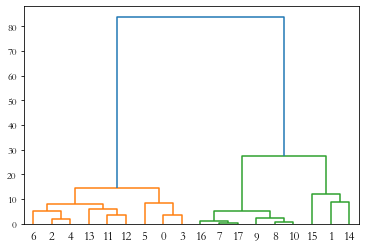

In [30]:
#根据手肘法 知道最佳值在k=4
from sklearn.cluster import AgglomerativeClustering #导入sklearn的层次聚类函数
import matplotlib.pyplot as plt
k = 4
model = AgglomerativeClustering(n_clusters = k, linkage = 'ward')
data =Gao_train
model.fit(data) #训练模型
# 详细输出原始数据及其类别
r = pd.concat([data, pd.Series(model.labels_, index = data.index)], axis = 1)  #详细输出每个样本对应的类别
from scipy.cluster.hierarchy import linkage,dendrogram
#这里使用scipy的层次聚类函数
Z = linkage(data, method = 'ward', metric = 'euclidean') #谱系聚类图
P = dendrogram(Z, 0) #画谱系聚类图
# plt.xticks(rotation=30)
plt.savefig(picpath+'/高钾分为4类-AGG层次聚类.png',dpi=300)
plt.show()


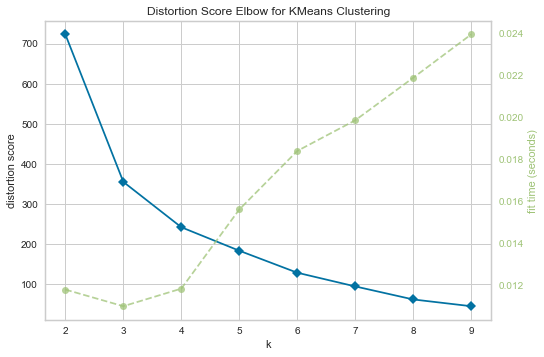

KElbowVisualizer(ax=<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=9, random_state=4), k=(2, 10),
                 locate_elbow=False)

In [31]:
from sklearn.cluster import KMeans
from yellowbrick.cluster.elbow import kelbow_visualizer


# Use the quick method and immediately show the figure
kelbow_visualizer(KMeans(random_state=4), Gao_train[Gao_train.columns[:]],timings=True,locate_elbow=False, k=(2,10))

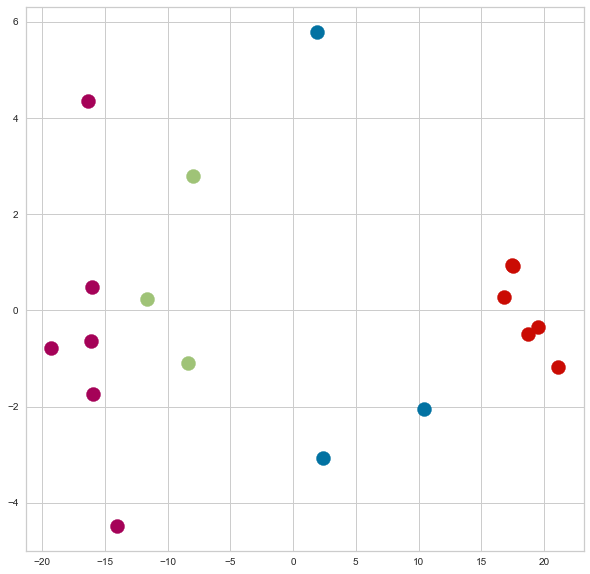

In [32]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
df1 = Gao_train
data1 = np.array(df1)

clf1 = AgglomerativeClustering(n_clusters = 4, linkage = 'ward')
s = clf1.fit(data1)
pred1 = clf1.fit_predict(data1)
score1 = silhouette_score(data1, pred1)

pca = PCA(n_components=2)  # 输出两维
newData1 = pca.fit_transform(data1)  # 载入N维

x1, y1 = [], []
x2, y2= [], []
x3, y3= [], []
x4, y4= [], []
x5, y5= [], []
x6, y6= [], []
for index, value in enumerate(pred1):
    if value == 0:
        x1.append(newData1[index][0])
        y1.append(newData1[index][1])
    elif value == 1:
        x2.append(newData1[index][0])
        y2.append(newData1[index][1])
    elif value == 2:
        x3.append(newData1[index][0])
        y3.append(newData1[index][1])
    elif value == 3:
        x4.append(newData1[index][0])
        y4.append(newData1[index][1])
    elif value == 4:
        x5.append(newData1[index][0])
        y5.append(newData1[index][1])
    elif value == 5:
        x6.append(newData1[index][0])
        y6.append(newData1[index][1])
# plt.subplot(132)
plt.figure(figsize=(10, 10))

# #定义坐标轴
k = 200
plt.scatter(x1, y1,s=k)
plt.scatter(x2, y2,s=k)
plt.scatter(x3, y3,s=k)
plt.scatter(x4, y4,s=k)
plt.scatter(x5, y5,s=k)
plt.scatter(x6, y6,s=k)
plt.savefig(picpath+'/高钾分为4类的数据分布二维可视化.png',dpi=300)
plt.show()



In [33]:
clf1.fit_predict(data1)

array([1, 0, 3, 1, 3, 1, 3, 2, 2, 2, 2, 3, 3, 3, 0, 0, 2, 2], dtype=int64)

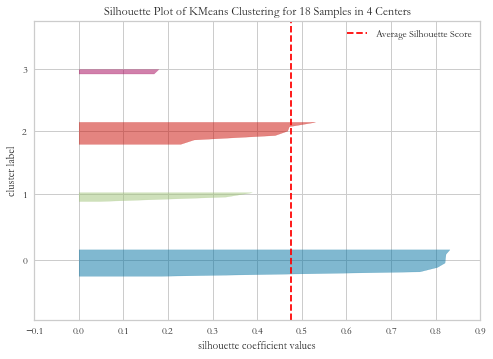

In [44]:
#评价聚类好坏[-1,1]
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.datasets import load_nfl

# Load a clustering dataset
X = Gao_train



# Instantiate the clustering model and visualizer
model = KMeans(4, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(X)        # Fit the data to the visualizer

#visualizer.savefig(picpath+"/高钾聚类评分")
visualizer.show();        # Finalize and render the figure


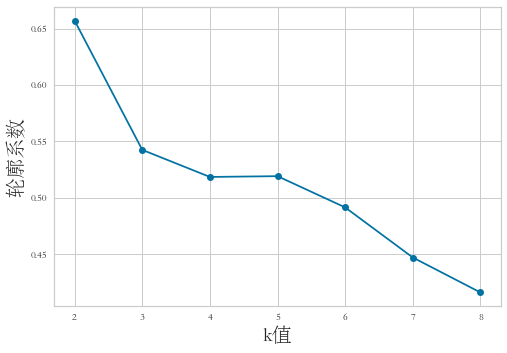

In [35]:
picpath="E:/2022国赛/C题/问题二代码及图片/问题二代码及图片/pic"
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering #导入sklearn的层次聚类函数
from sklearn.metrics import silhouette_score#引入样本轮廓系数  用来评价聚类的效果
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['STSong']
data = np.array(Qian_train)

Scores = []  # 存放轮廓系数
SSE = []  # 存放每次结果的误差平方和
for k in range(2, 9):
    estimator = AgglomerativeClustering(n_clusters = k, linkage = 'ward')
    estimator.fit(data)
    Scores.append(silhouette_score(
        np.array(data), estimator.labels_, metric='euclidean'))
X = range(2,9)
plt.xlabel('k值',fontsize=20)
plt.ylabel('轮廓系数',fontsize=20)
plt.plot(X, Scores, 'o-')
plt.savefig(picpath+'/AGG聚类——铅钡数据手肘法.png',dpi=300)
plt.show()

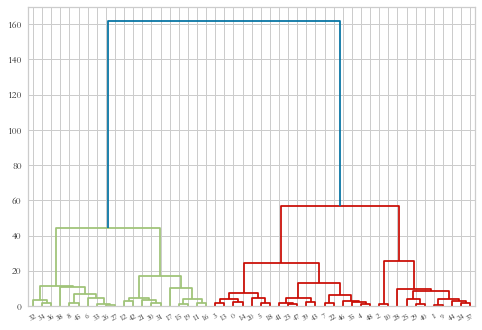

In [36]:
from sklearn.cluster import AgglomerativeClustering #导入sklearn的层次聚类函数
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage,dendrogram
k = 5
model = AgglomerativeClustering(n_clusters = k, linkage = 'ward')
data =Qian_train
model.fit(data) #训练模型
#详细输出原始数据及其类别
r = pd.concat([data, pd.Series(model.labels_, index = data.index)], axis = 1)  #详细输出每个样本对应的类别

#这里使用scipy的层次聚类函数
Z = linkage(data, method = 'ward', metric = 'euclidean') #谱系聚类图
P = dendrogram(Z, 0) #画谱系聚类图
# plt.figure(figsize=(10,6),dpi=300)
plt.xticks(rotation=30)
plt.savefig(picpath+'/铅钡分为5类-AGG层次聚类.png',dpi=300)
plt.show()

In [37]:
Qian_train

,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO)
0,36.28,0.00,1.05,2.34
1,20.14,0.00,0.00,1.48
2,4.61,0.00,0.00,3.19
3,33.59,0.00,0.21,3.51
4,29.64,0.00,0.00,2.93
5,37.36,0.00,0.71,0.00
6,53.79,7.92,0.00,0.50
7,31.94,0.00,0.00,0.47
8,50.61,2.31,0.00,0.63
9,19.79,0.00,0.00,1.44


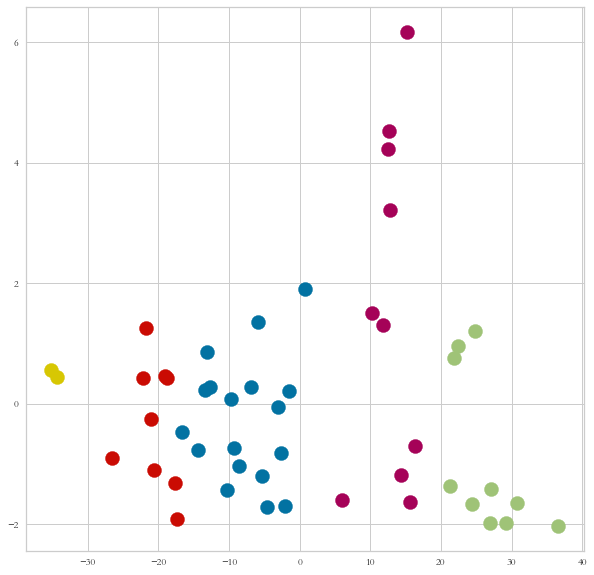

In [38]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
df1 = Qian_train
data1 = np.array(df1)

clf1 = AgglomerativeClustering(n_clusters = 5, linkage = 'ward')
s = clf1.fit(data1)
pred1 = clf1.fit_predict(data1)
score1 = silhouette_score(data1, pred1)

pca = PCA(n_components=2)  # 输出两维
newData1 = pca.fit_transform(data1)  # 载入N维

x1, y1 = [], []
x2, y2= [], []
x3, y3= [], []
x4, y4= [], []
x5, y5= [], []
x6, y6= [], []
for index, value in enumerate(pred1):
    if value == 0:
        x1.append(newData1[index][0])
        y1.append(newData1[index][1])
    elif value == 1:
        x2.append(newData1[index][0])
        y2.append(newData1[index][1])
    elif value == 2:
        x3.append(newData1[index][0])
        y3.append(newData1[index][1])
    elif value == 3:
        x4.append(newData1[index][0])
        y4.append(newData1[index][1])
    elif value == 4:
        x5.append(newData1[index][0])
        y5.append(newData1[index][1])
# plt.subplot(132)
plt.figure(figsize=(10, 10))

# #定义坐标轴
k = 200
plt.scatter(x1, y1,s=k)
plt.scatter(x2, y2,s=k)
plt.scatter(x3, y3,s=k)
plt.scatter(x4, y4,s=k)
plt.scatter(x5, y5,s=k)
plt.savefig(picpath+'/铅钡分为6类的数据分布二维可视化.png',dpi=300)
plt.show()



In [39]:
clf1.fit_predict(data1)

array([0, 2, 4, 0, 0, 0, 3, 0, 3, 2, 4, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 2, 2, 3, 3, 2, 2, 1, 1, 3, 3, 3, 0, 3, 2, 3, 0, 2, 0, 1, 0,
       2, 3, 0, 0, 0], dtype=int64)

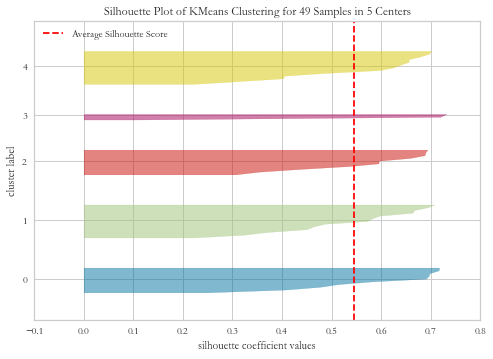

In [40]:
#评价聚类好坏[-1,1]
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.datasets import load_nfl

# Load a clustering dataset
X = Qian_train



# Instantiate the clustering model and visualizer
model = KMeans(5, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show();        # Finalize and render the figure


In [41]:
# file3=file3.drop('文物编号',axis=1)
file3=file3.fillna(0)

file3.iloc[0,:]


文物编号              A1
表面风化             无风化
二氧化硅(SiO2)     78.45
氧化钠(Na2O)        0.0
氧化钾(K2O)         0.0
氧化钙(CaO)        6.08
氧化镁(MgO)        1.86
氧化铝(Al2O3)      7.23
氧化铁(Fe2O3)      2.15
氧化铜(CuO)        2.11
氧化铅(PbO)         0.0
氧化钡(BaO)         0.0
五氧化二磷(P2O5)     1.06
氧化锶(SrO)        0.03
氧化锡(SnO2)        0.0
二氧化硫(SO2)       0.51
Name: 0, dtype: object

In [42]:
Qian=

SyntaxError: invalid syntax (<ipython-input-42-0f0a71d38002>, line 1)